In [2]:
import pandas as pd
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt

In [3]:
sns.set_context("poster")
sns.despine()
sns.set(font_scale = 3)
plt.rcParams['figure.figsize']=(15,15)

<Figure size 432x288 with 0 Axes>

In [4]:
folders = ['json', 'gltf', 'gltf_on_demand', 'gltf_on_demand_multiple_files', 'gltf_on_demand_multiple_files_lod', 'gltf_on_demand_multiple_files_lod_active_scene']

fileNames = ['fps', 'results', 'events']
stats = ['FPS', 'MEMORY', 'CPU', 'NAME']

def readFilesIntoDataframes(folder):
    dfs = {}
    
        
    for fileName in fileNames:
        df = pd.read_json(f"results/{folder}/8/{fileName}.json")
            
        if 'GPU_MEMORY' in df.columns:
            del df['GPU_MEMORY']
        
        dfs[fileName] = df
        
    return dfs

def get_domain_specific_dataframes():
    result = {}
    
    for stat in stats:
        result[stat] = []
    
    for config in folders:
        dfs = readFilesIntoDataframes(config)
        for stat in fileNames:
            df = dfs[stat]
            
            for col in df.columns:
                if (col != "TIME" and col != 'x' and col != 'y') :
                    name_replacement = {col: f"{config}_{col}"}
                    sub_df = df[["TIME", col]]
                    sub_df = df.rename(columns=name_replacement)
                    result[col].append(sub_df)

            
            
    return result

In [5]:
result = get_domain_specific_dataframes()

df_dict = {}

for stat, dfs in result.items():    
    
    correct_dfs = []
    
    for df in dfs:    
        #print(df.columns)
        correct_columns = list(filter(lambda col: '_x' not in col and '_y' not in col and ('_' in col or col == 'TIME'), df.columns))
        print(correct_columns)
        correct_df = df[correct_columns]
        correct_dfs.append(correct_df)

    df_merged = reduce(lambda left,right: pd.merge(left,right,on=['TIME'], how='outer'), correct_dfs)
    df_dict[stat] = df_merged

['TIME', 'json_FPS']
['TIME', 'gltf_FPS']
['TIME', 'gltf_on_demand_FPS']
['TIME', 'gltf_on_demand_multiple_files_FPS']
['TIME', 'gltf_on_demand_multiple_files_lod_FPS']
['TIME', 'gltf_on_demand_multiple_files_lod_active_scene_FPS']
['TIME', 'json_MEMORY']
['TIME', 'gltf_MEMORY']
['TIME', 'gltf_on_demand_MEMORY']
['TIME', 'gltf_on_demand_multiple_files_MEMORY']
['TIME', 'gltf_on_demand_multiple_files_lod_MEMORY']
['TIME', 'gltf_on_demand_multiple_files_lod_active_scene_MEMORY']
['TIME', 'json_CPU']
['TIME', 'gltf_CPU']
['TIME', 'gltf_on_demand_CPU']
['TIME', 'gltf_on_demand_multiple_files_CPU']
['TIME', 'gltf_on_demand_multiple_files_lod_CPU']
['TIME', 'gltf_on_demand_multiple_files_lod_active_scene_CPU']
['TIME', 'json_NAME']
['TIME', 'gltf_NAME']
['TIME', 'gltf_on_demand_NAME']
['TIME', 'gltf_on_demand_multiple_files_NAME']
['TIME', 'gltf_on_demand_multiple_files_lod_NAME']
['TIME', 'gltf_on_demand_multiple_files_lod_active_scene_NAME']


In [6]:
json_events = df_dict['NAME'][["TIME", "json_NAME"]]
json_events = json_events[json_events['json_NAME'].notna()]
json_events = json_events[json_events['json_NAME'].str.contains("Add mesh")]


gltf_events = df_dict['NAME'][["TIME", "gltf_NAME"]]
gltf_events = gltf_events[gltf_events['gltf_NAME'].notna()]
gltf_events = gltf_events[gltf_events['gltf_NAME'].str.contains("Add mesh")]

gltf_od_events = df_dict['NAME'][["TIME", "gltf_on_demand_NAME"]]
gltf_od_events = gltf_od_events[gltf_od_events['gltf_on_demand_NAME'].notna()]
gltf_od_events = gltf_od_events[gltf_od_events['gltf_on_demand_NAME'].str.contains("Add mesh")]

gltf_od_mf_events = df_dict['NAME'][["TIME", "gltf_on_demand_multiple_files_NAME"]]
gltf_od_mf_events = gltf_od_mf_events[gltf_od_mf_events['gltf_on_demand_multiple_files_NAME'].notna()]
gltf_od_mf_events = gltf_od_mf_events[gltf_od_mf_events['gltf_on_demand_multiple_files_NAME'].str.contains("Add mesh")]

gltf_od_mf_lod_events = df_dict['NAME'][["TIME", "gltf_on_demand_multiple_files_lod_NAME"]]
gltf_od_mf_lod_events = gltf_od_mf_lod_events[gltf_od_mf_lod_events['gltf_on_demand_multiple_files_lod_NAME'].notna()]
gltf_od_mf_lod_events = gltf_od_mf_lod_events[gltf_od_mf_lod_events['gltf_on_demand_multiple_files_lod_NAME'].str.contains("Add mesh")]

gltf_od_mf_lod_as_events = df_dict['NAME'][["TIME", "gltf_on_demand_multiple_files_lod_active_scene_NAME"]]
gltf_od_mf_lod_as_events = gltf_od_mf_lod_as_events[gltf_od_mf_lod_as_events['gltf_on_demand_multiple_files_lod_active_scene_NAME'].notna()]
gltf_od_mf_lod_as_events = gltf_od_mf_lod_as_events[gltf_od_mf_lod_as_events['gltf_on_demand_multiple_files_lod_active_scene_NAME'].str.contains("Add mesh")]


In [6]:
gltf_od_mf_lod_as_events

,TIME,gltf_on_demand_multiple_files_lod_active_scene_NAME
160,1.306,Add mesh
163,5.758,Add mesh
169,36.513,Add mesh
170,36.548,Add mesh
174,63.357,Add mesh
177,66.809,Add mesh
181,95.308,Add mesh
184,104.428,Add mesh
188,126.973,Add mesh
191,146.475,Add mesh


In [7]:
fps_df = df_dict['FPS']
fps_df = fps_df[['TIME','gltf_on_demand_FPS']]
fps_df = fps_df[fps_df['gltf_on_demand_FPS'].notna()]
fps_df.set_index('TIME')

cpu_df = df_dict['CPU']
cpu_df = cpu_df[['TIME','gltf_on_demand_CPU']]
cpu_df = cpu_df[cpu_df['gltf_on_demand_CPU'].notna()]
cpu_df.set_index('TIME')




,gltf_on_demand_CPU
TIME,
-9,0.0
-8,4.6
-7,1.5
-6,0.0
-5,0.0
...,...
171,103.0
172,100.0
173,100.1


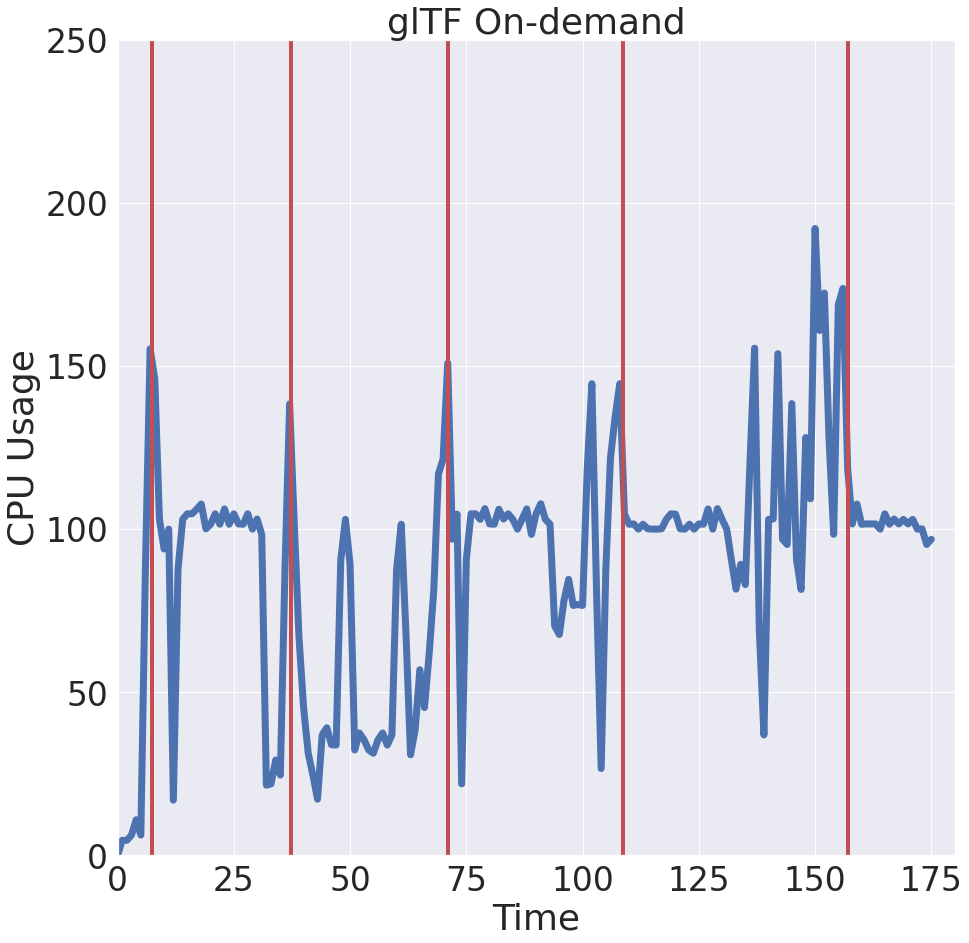

In [8]:
ax = sns.lineplot(data=cpu_df, x='TIME', y='gltf_on_demand_CPU', linewidth='7')
ax.set(ylim=(0, 250))
ax.set(xlim=(0, 180))
ax.set(title='glTF On-demand', xlabel='Time', ylabel='CPU Usage')

for index, value in gltf_od_events['TIME'].items():
    plt.axvline(value, color='r', linewidth='4')
plt.show()

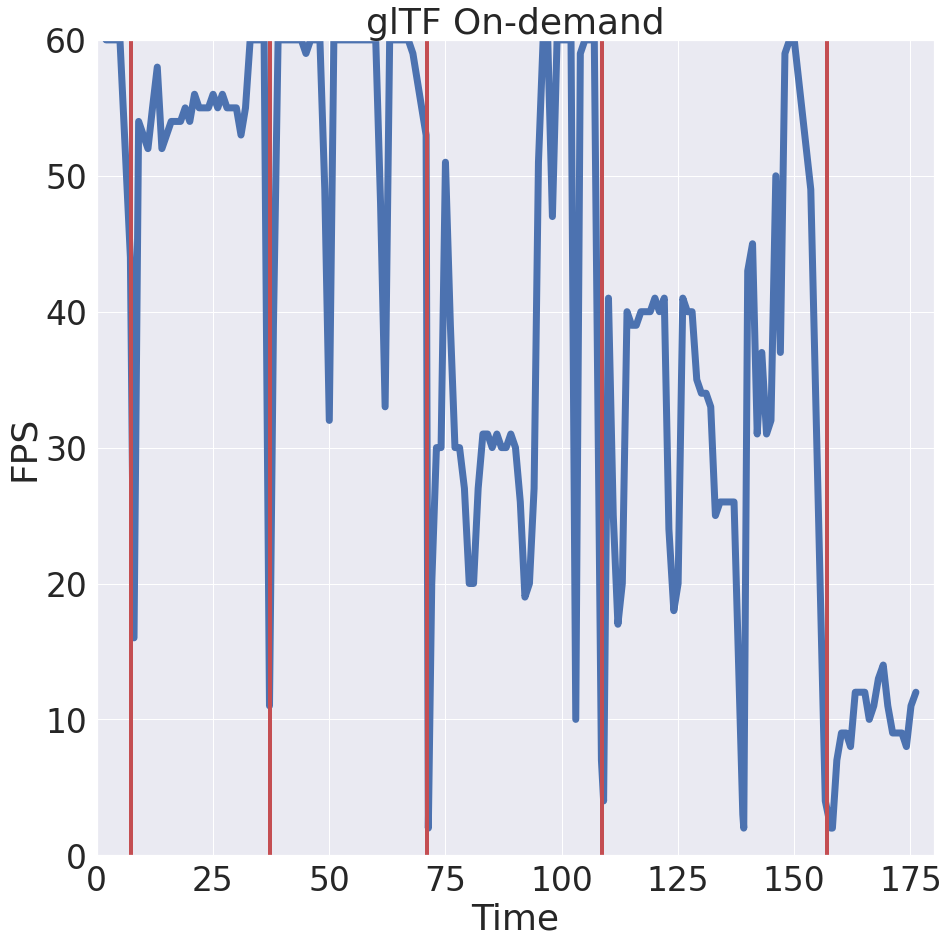

In [9]:
ax = sns.lineplot(data=fps_df, x='TIME', y='gltf_on_demand_FPS', linewidth='7')
ax.set(ylim=(0, 60))
ax.set(xlim=(0, 180))
ax.set(title='glTF On-demand', xlabel='Time', ylabel='FPS')

for index, value in gltf_od_events['TIME'].items():
    plt.axvline(value, color='r', linewidth='4')
plt.show()